# Analysis 2e6 muons by CJ - ROI cut
In this notebook, we will see the last data from CJ. Only the entries within the ROI are considered. The ROI is defined as follows:
- `x`, `y` in `[-500, +500]`
- `z` in `[-1000, +1000]`

The file after the cut has `9324212` entries and `11077` events.

In [1]:
import pandas as pd
import os

dir_in = os.path.join("..", "Data", "cutROI")
#files = ["output2eROI_part1.csv", "output2eROI_part2.csv", "output2eROI_part3.csv", "output2eROI_part4.csv", "output2eROI_part5.csv"]
#df = pd.read_csv(os.path.join(dir_in, files[0]), index_col=False)
#for file in files[1:]:
#    dfi = pd.read_csv(os.path.join(dir_in, file), index_col=False)
#    df = pd.concat([df, dfi])
#df.head()

new_file = "output2eROI_all_wt_ops.csv"
opyield = 40
df = pd.read_csv(os.path.join(dir_in, new_file), index_col=False)
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'PID', 'ParentTrackID',
       'energydeposition', 'kineticenergy', 'time', 'x', 'y', 'z', 'px', 'py',
       'pz', 'eventnumber', 'tracknumber', 'creatorprocess',
       'parentnucleusPID', 'OPs'],
      dtype='object')

In [23]:
df[df.PID==13]

,Unnamed: 0,Unnamed: 0.1,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,px,py,pz,eventnumber,tracknumber,creatorprocess,parentnucleusPID,OPs
8,8,8,13,0,3161.9500,3.269390e+09,44.0060,-201.188,215.751,989.769,0.658201,-0.354737,-0.664028,555,1,None,0,0.0
9,9,9,13,0,1391.8700,3.269390e+09,44.0295,-196.537,213.244,985.077,0.658201,-0.354738,-0.664028,555,1,None,0,0.0
10,10,10,13,0,27.3453,3.269390e+09,44.0302,-196.404,213.173,984.943,0.658201,-0.354738,-0.664028,555,1,None,0,0.0
11,11,11,13,0,3201.4200,3.269390e+09,44.0798,-186.627,207.903,975.079,0.658201,-0.354738,-0.664027,555,1,None,0,0.0
12,12,12,13,0,4650.8200,3.269220e+09,44.1561,-171.569,199.788,959.888,0.658203,-0.354737,-0.664026,555,1,None,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9323952,9323952,2030189,13,0,3881.5900,1.063450e+09,36.9613,-471.730,199.097,450.303,-0.475555,-0.263591,-0.839266,19874,1,None,0,0.0
9323953,9323953,2030190,13,0,3216.0200,1.063440e+09,37.0188,-479.918,194.558,435.852,-0.475553,-0.263597,-0.839265,19874,1,None,0,0.0
9323954,9323954,2030191,13,0,1052.1600,1.063440e+09,37.0340,-482.092,193.353,432.015,-0.475551,-0.263598,-0.839266,19874,1,None,0,0.0
9323955,9323955,2030192,13,0,1836.8600,1.063440e+09,37.0655,-486.582,190.865,424.092,-0.475552,-0.263601,-0.839264,19874,1,None,0,0.0


In [4]:
df = df[df.energydeposition > 0]

op_yield = 40 # 40 op /kev
df["OPcounter"] = df.energydeposition * op_yield * df.OPs
df["energydetected"] = df.OPcounter / op_yield

dfdet = df[df.OPcounter > 0]
print("[Info] Number of entries: {}".format(df.shape[0]))
print("[Info] Number of distinct events: {}".format(df.eventnumber.nunique()))
print("[Info] Number of detected entries: {}".format(dfdet.shape[0]))
print("[Info] Number of detected events: {}".format(dfdet.eventnumber.nunique()))
df.head()

[Info] Number of entries: 6830311
[Info] Number of distinct events: 10594
[Info] Number of detected entries: 1874094
[Info] Number of detected events: 6670


,Unnamed: 0,Unnamed: 0.1,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,px,py,pz,eventnumber,tracknumber,creatorprocess,parentnucleusPID,OPs,OPcounter,energydetected
2,2,2,22,341,3.20630,0.0,44.3455,410.980,174.100,-946.000,-0.604181,-0.731574,-0.315855,210,1123,eBrem,0,0.0,0.0,0.0
3,3,3,11,1123,168.22100,0.0,44.3460,411.045,174.073,-946.066,0.673383,-0.283750,-0.682672,210,1590,phot,0,0.0,0.0,0.0
4,4,4,11,1123,3.54527,0.0,44.0266,468.747,244.047,-915.800,0.369252,0.241678,-0.897355,210,1589,compt,0,0.0,0.0,0.0
5,5,5,11,1123,8.27316,0.0,43.8606,491.863,275.561,-885.021,-0.712698,0.693865,0.103020,210,1588,compt,0,0.0,0.0,0.0
7,7,7,11,799,179.84300,0.0,33.9918,211.392,-220.104,-960.597,-0.650484,-0.157628,0.742984,466,1138,compt,0,0.0,0.0,0.0


In [3]:
edep_gb = df.groupby("eventnumber").energydeposition.sum().reset_index()
edep_muons_gb = df[df.PID==13].groupby("eventnumber").energydeposition.sum().reset_index()
edep_electrons_gamma_gb = df[(df.PID.isin([11, 22]))].groupby("eventnumber").energydeposition.sum().reset_index()

stats_edep = edep_gb.energydeposition.describe()
stats_muons_edep = edep_muons_gb.energydeposition.describe()
stats_electron_gamma_edep = edep_electrons_gamma_gb.energydeposition.describe()

edet_gb = df.groupby("eventnumber").energydetected.sum().reset_index()
edet_muons_gb = df[df.PID==13].groupby("eventnumber").energydetected.sum().reset_index()
edet_electrons_gamma_gb = df[(df.PID.isin([11, 22]))].groupby("eventnumber").energydetected.sum().reset_index()

stats_edet = edet_gb.energydetected.describe()
stats_muons_edet = edet_muons_gb.energydetected.describe()
stats_electron_gamma_edet = edet_electrons_gamma_gb.energydetected.describe()

In [4]:
print("ENERGY DEPOSITION")
pd.DataFrame([stats_edep, stats_muons_edep, stats_electron_gamma_edep], index=['all', 'muons', 'e- or gammas'])

ENERGY DEPOSITION


,count,mean,std,min,25%,50%,75%,max
all,10594.0,343113.138706,1.744351e+06,0.000178,2929.233602,148068.45479,371672.272071,1.429126e+08
muons,6957.0,213732.264724,1.438959e+05,693.891000,102318.798960,200798.02700,291820.413000,1.006911e+06
e- or gammas,10167.0,161774.938609,1.229577e+06,0.278236,3387.649235,38240.85595,108288.066836,9.993033e+07


In [5]:
print("ENERGY DETECTED")
pd.DataFrame([stats_edet, stats_muons_edet, stats_electron_gamma_edet], index=['all', 'muons', 'e- or gammas'])

ENERGY DETECTED


,count,mean,std,min,25%,50%,75%,max
all,10594.0,2420.072214,16357.267489,0.0,0.0,10.126201,2301.962125,1.124655e+06
muons,6957.0,1548.542628,2092.131211,0.0,0.0,153.499164,2862.419669,1.439721e+04
e- or gammas,10167.0,1123.670845,11370.018666,0.0,0.0,13.837642,552.286755,7.814673e+05


In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

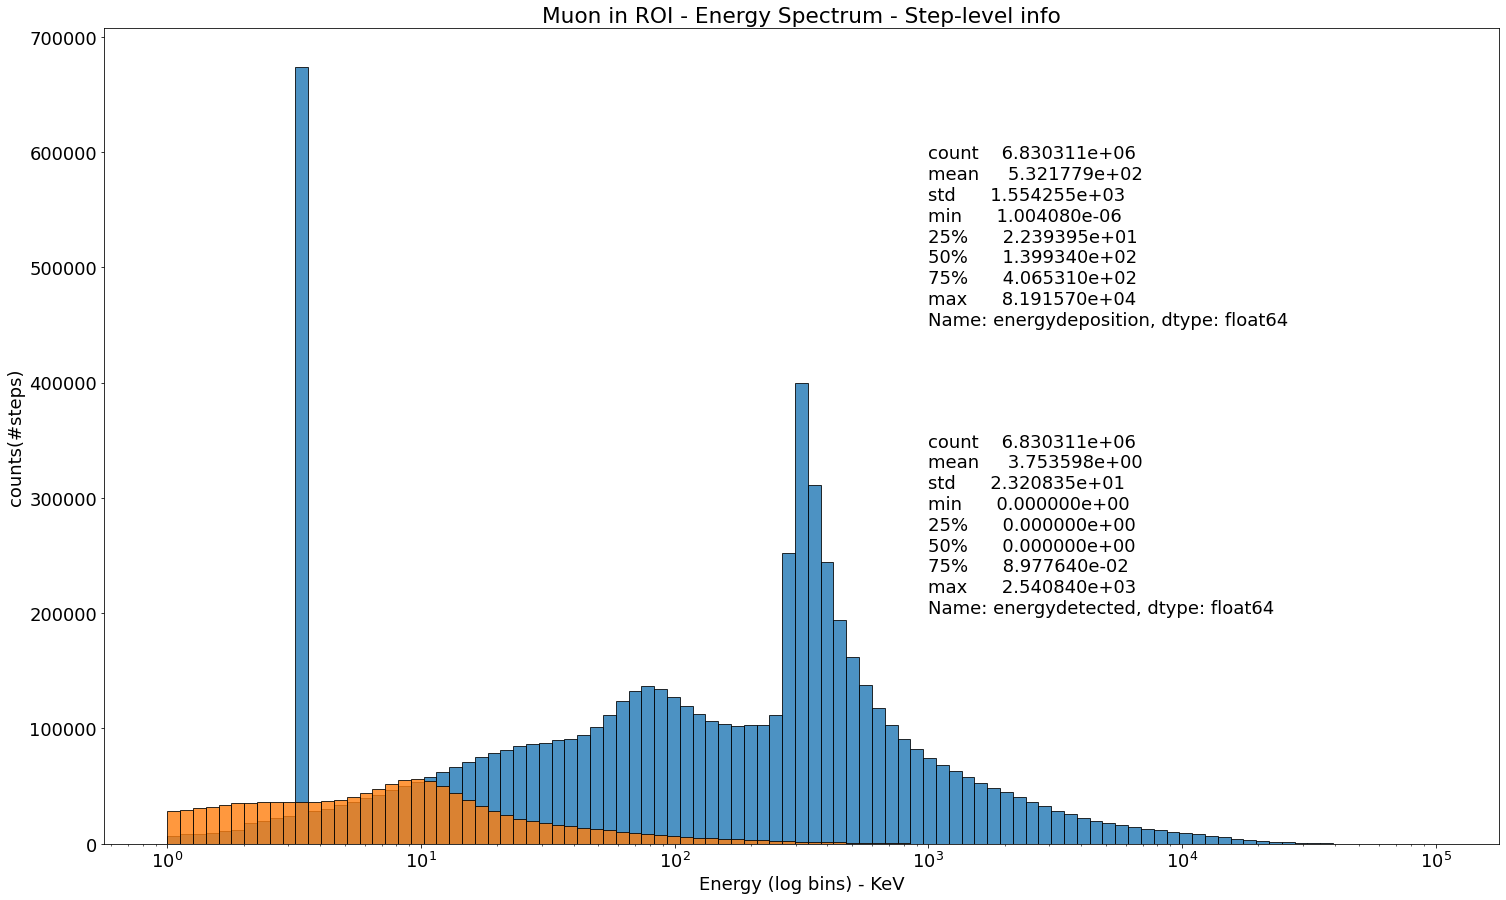

In [18]:
# STEP-LEVEL DEPOSITIONS
alpha = 0.8
bins = np.logspace(0, 5, 100)
plt.hist(df.energydeposition, bins=bins, edgecolor='k', alpha=alpha)
plt.hist(df.energydetected, bins=bins, edgecolor='k', alpha=alpha)
plt.xscale('log')
plt.title("Muon in ROI - Energy Spectrum - Step-level info")
plt.xlabel("Energy (log bins) - KeV")
plt.ylabel("counts(#steps)")
plt.text(1000, 450000, str(df.energydeposition.describe()))
plt.text(1000, 200000, str(df.energydetected.describe()))
plt.show()

# Note: huge peak at energy 3.2KeV is MOST of the time due to
# Gamma's deposits. These gammas are usually produced by eBrem process.

In [48]:
df["sec"] = df.time / (10**9)

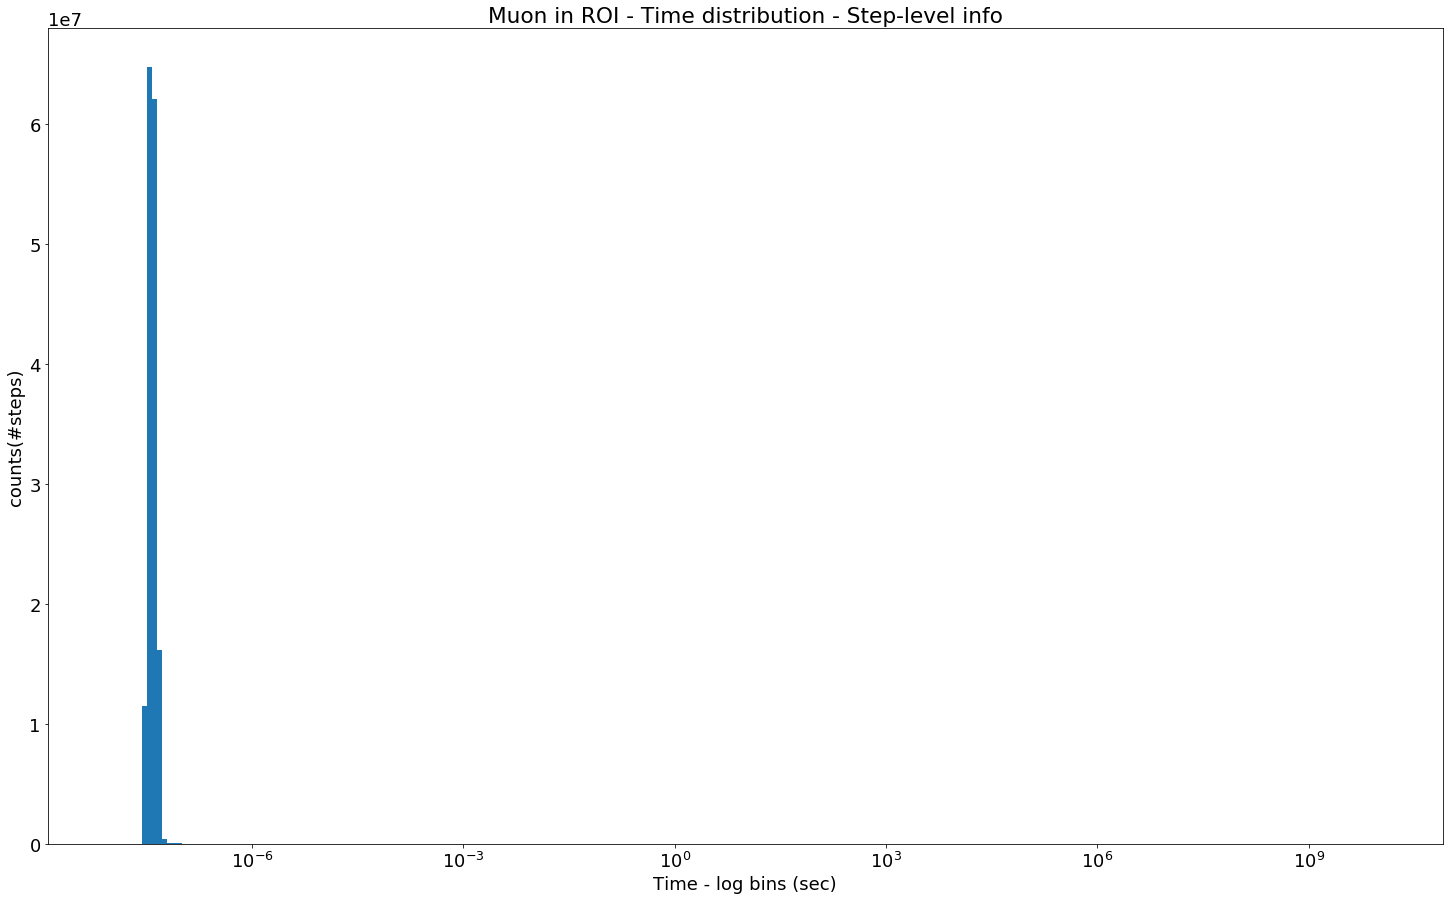

count    6.830311e+06
mean     1.131832e+11
std      1.108805e+14
min      2.846610e-08
25%      3.570380e-08
50%      3.863040e-08
75%      4.262390e-08
max      1.484610e+17
Name: sec, dtype: float64

In [49]:
plt.hist(df.sec, bins=np.logspace(-8, 10, 250), density=True)
plt.xscale('log')
plt.title("Muon in ROI - Time distribution - Step-level info")
plt.xlabel("Time - log bins (sec)")
plt.ylabel("counts(#steps)")
plt.show()

df.sec.describe()

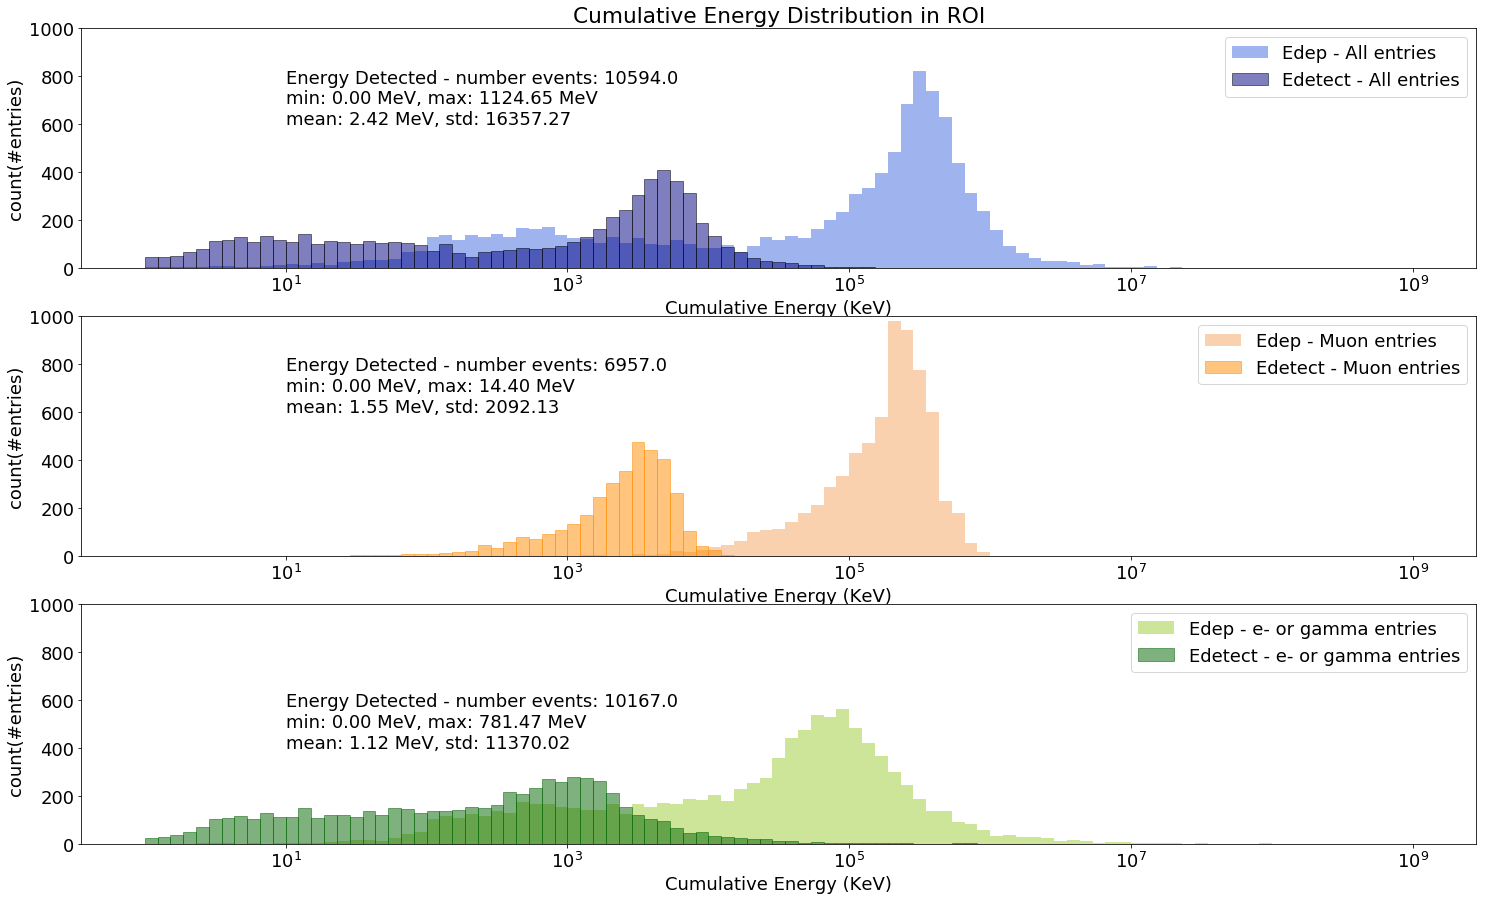

In [8]:
label_template = "Energy Detected - number events: {:}\n" \
                 "min: {:.2f} MeV, max: {:.2f} MeV\n" \
                 "mean: {:.2f} MeV, std: {:.2f}"

label_all = label_template.format(stats_edet.loc["count"], stats_edet.loc["min"]/1000, stats_edet.loc["max"]/1000, 
                                  stats_edet.loc["mean"]/1000, stats_edet.loc["std"])
label_muon = label_template.format(stats_muons_edet.loc["count"], stats_muons_edet.loc["min"]/1000, stats_muons_edet.loc["max"]/1000, 
                                   stats_muons_edet.loc["mean"]/1000, stats_muons_edet.loc["std"])
label_egam = label_template.format(stats_electron_gamma_edet.loc["count"], stats_electron_gamma_edet.loc["min"]/1000, stats_electron_gamma_edet.loc["max"]/1000,
                                   stats_electron_gamma_edet.loc["mean"]/1000, stats_electron_gamma_edet.loc["std"])

bins = np.logspace(0, 9, 100)
plt.subplot(3, 1, 1)
plt.hist(edep_gb.energydeposition, bins, label="Edep - All entries", alpha=0.5, color='royalblue')
plt.hist(edet_gb.energydetected, bins, label="Edetect - All entries", alpha=0.5, color='navy', edgecolor='black')
plt.title("Cumulative Energy Distribution in ROI")
plt.xlabel("Cumulative Energy (KeV)")
plt.ylabel("count(#entries)")
plt.xscale('log')
plt.ylim(0, 1000)
plt.legend()
plt.text(10, 600, label_all)


plt.subplot(3, 1, 2)
plt.hist(edep_muons_gb.energydeposition, bins, label="Edep - Muon entries", alpha=0.5, color='sandybrown')
plt.hist(edet_muons_gb.energydetected, bins, label="Edetect - Muon entries", alpha=0.5, color='darkorange', edgecolor='darkorange')
plt.xlabel("Cumulative Energy (KeV)")
plt.ylabel("count(#entries)")
plt.xscale('log')
plt.ylim(0, 1000)
plt.legend()
plt.text(10, 600, label_muon)

plt.subplot(3, 1, 3)
plt.hist(edep_electrons_gamma_gb.energydeposition, bins, label="Edep - e- or gamma entries", alpha=0.5, color='yellowgreen')
plt.hist(edet_electrons_gamma_gb.energydetected, bins, label="Edetect - e- or gamma entries", alpha=0.5, color='darkgreen', edgecolor='darkgreen')
plt.xlabel("Cumulative Energy (KeV)")
plt.ylabel("count(#entries)")
plt.xscale('log')
plt.ylim(0, 1000)
plt.legend()
plt.text(10, 400, label_egam)

plt.show()

The above plots reveal interesting thing about energy deposition distribution.

1. **first plot**: we consider the scenario in which *all the entries* with Edep>0 deposit in LAr and then potentially generate scintillation
1. **second plot**: we consider only the energy deposition by *muon entries*. If the Edep consider also the energy passed to other particles, then this entries are not meaningful for out purposes.
1. **third plot**: we consider only the energy depositions by *electrons and gammas* particles. This is the scenario in which the Edep field consider both the deposited energy and the energy passed to other particles. In this case, the only particle that lead to scintillation are electrons and gammas.

# Space analysis

                             count        mean         std  min         25%  \
muon propagation space(mm)  6957.0  966.159798  592.206166  0.0  468.782358   

                                   50%          75%          max  
muon propagation space(mm)  971.533505  1383.693684  2291.486212  


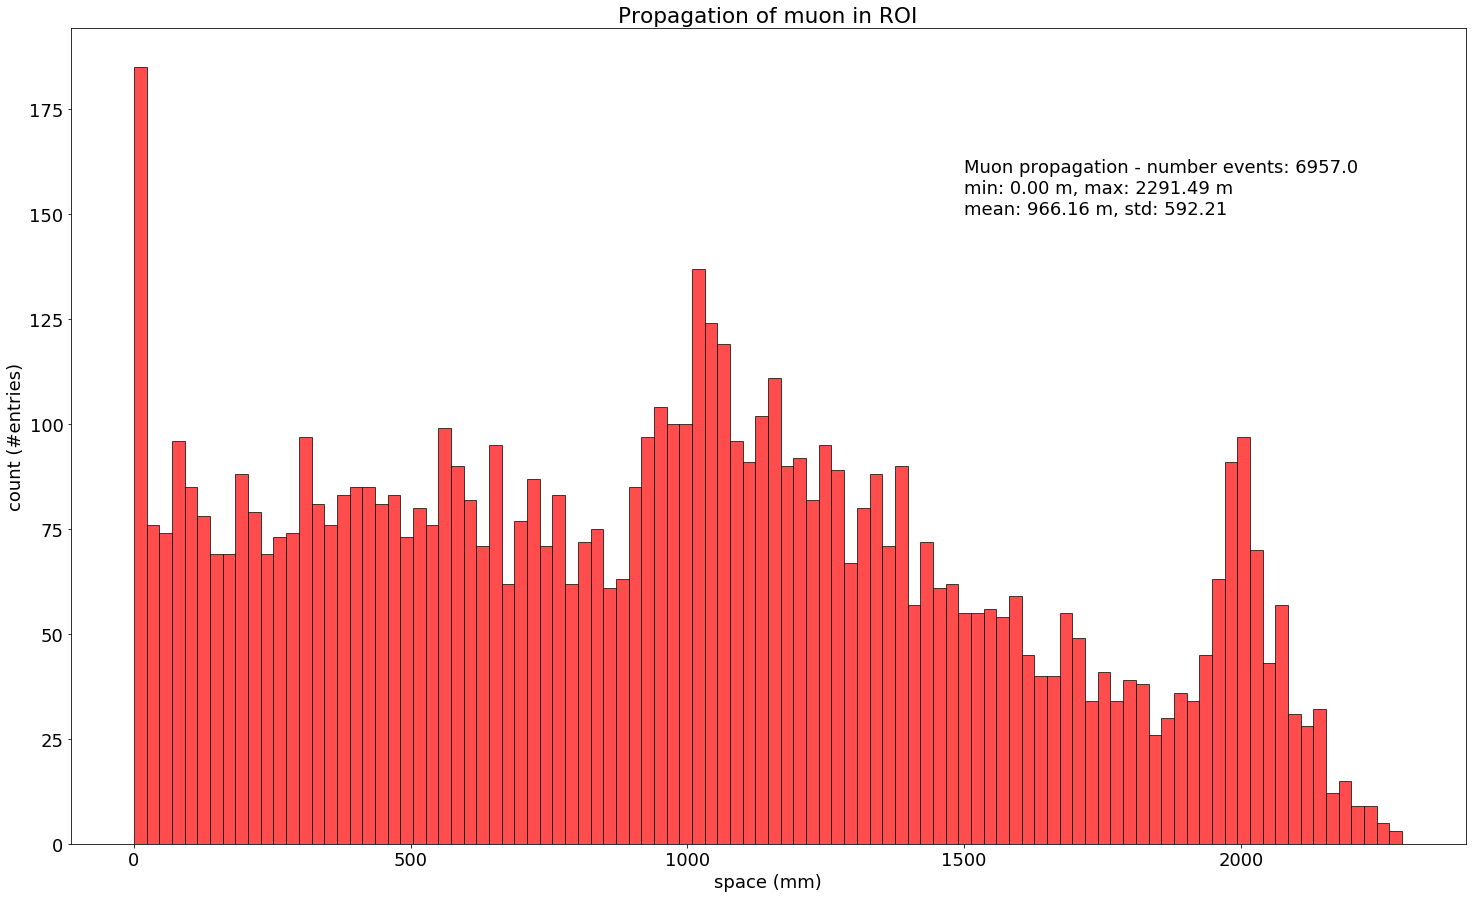

In [26]:
label_template_space = "Muon propagation - number events: {:}\n" \
                       "min: {:.2f} m, max: {:.2f} m\n" \
                       "mean: {:.2f} m, std: {:.2f}"

muons_gb = df[df.PID==13][["eventnumber", "time", "x", "y", "z"]].sort_values("time").groupby("eventnumber")
first_muons = muons_gb.first()
last_muons = muons_gb.last()

first_muons = first_muons.reset_index()
first_muons["space"] = np.linalg.norm(first_muons[["x", "y", "z"]].values - last_muons[["x", "y", "z"]].values, axis=1)
space_stats = first_muons.space.describe()

print(pd.DataFrame([space_stats], index=['muon propagation space(mm)']))

plt.hist(first_muons.space, bins=100, color='red', alpha=0.7, edgecolor='k')
plt.title("Propagation of muon in ROI")
plt.xlabel("space (mm)")
plt.ylabel("count (#entries)")
plt.text(1500, 150, label_template_space.format(space_stats.loc["count"], space_stats.loc["min"], space_stats.loc["max"],
                                    space_stats.loc["mean"], space_stats.loc["std"]))
plt.show()

# Analysis OP counter

In [10]:
df["energydetected"] = df.OPcounter / op_yield

opcounter_gb = df.groupby("eventnumber").energydetected.sum().reset_index()
stats_energydetected = opcounter_gb.energydetected.describe()
stats_energydetected

count    1.059400e+04
mean     2.420072e+03
std      1.635727e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.012620e+01
75%      2.301962e+03
max      1.124655e+06
Name: energydetected, dtype: float64

In [ ]:
label = "min: {:.2f}, max: {:.2f}\n".format(stats_opcounter.loc["min"], stats_opcounter.loc["max"]/1000)
label += "mean: {:.2f}, std: {:.2f}\n".format(stats_opcounter.loc["mean"]/1000, stats_opcounter.loc["std"])

bins = np.logspace(0, 9, 100)

# histo edep
plt.hist(edep_gb.energydeposition, bins, alpha=0.7, label="Cum.Edep")
# histo op counter
plt.hist(opcounter_gb.OPcounter, bins, alpha=0.7, label="#OPs Detected")

# layout
plt.title("Comparison Cum.Edep vs OP Detected")
plt.xlabel("Cumulative Edep (KeV) or Number OPs Detected")
plt.ylabel("count(#entries)")
plt.xscale('log')
plt.legend()
plt.show()